In [ ]:
import pandas as pd
df = pd.read_excel('/content/cdata_final.xlsx')
df.isna().sum()

,0
Question,0
Correct_Code,0
Code_with_Error,0
Type_of_Error,0
Header_and_Main_Declaration,0
Incomprehensible_Code,1
Comprehensible_Code_with_logical_errors,0
Comprehensible_code_with_syntax_errors,2
Correct_code_and_output,0
Final_Marks,0


In [ ]:
df = df.fillna(method='pad')

<ipython-input-15-4d7ddb4551e6>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='pad')


In [ ]:
df = df.iloc[:,4:10]
df

,Header_and_Main_Declaration,Incomprehensible_Code,Comprehensible_Code_with_logical_errors,Comprehensible_code_with_syntax_errors,Correct_code_and_output,Final_Marks
0,2,2.0,2,2.0,2,10
1,2,2.0,2,2.0,0,8
2,2,2.0,1,1.0,1,7
3,2,1.0,1,1.0,0,5
4,2,2.0,1,1.0,0,6
...,...,...,...,...,...,...
1171,1,0.0,0,0.0,0,1
1172,2,2.0,2,1.0,1,8
1173,2,0.0,0,0.0,0,2
1174,2,2.0,1,2.0,1,8


In [ ]:
target = []
for data in df['Final_Marks']:
    if data < 5:
        target.append(0)
    else:
        target.append(1)

df = df.drop('Final_Marks', axis = 1)

In [ ]:
df['Target'] = target

In [ ]:
#1
import numpy as np
features = df.drop(columns=['Target'])
target = df['Target']

means = {} #empty list to store all means
classes = target.unique() # takes all classes which are unique

for cls in classes:
    class_data = features[target == cls]
    means[cls] = class_data.mean(axis=0) #mean

print("Class Means (Centroids):")
for cls, mean in means.items():
    print(f"Class {cls}: {mean.round(5).tolist()}")

Class Means (Centroids):
Class 1: [1.88662, 1.56815, 1.30828, 1.23694, 0.67643]
Class 0: [1.53197, 0.34271, 0.54476, 0.68286, 0.04348]


In [ ]:
spreads = {} #empty list to store all spreads

for cls in classes:
    class_data = features[target == cls]
    spreads[cls] = class_data.std(axis=0)

print("Class Spreads (Standard Deviations):")
for cls, spread in spreads.items():
    print(f"Class {cls}: {spread.round(5).tolist()}")

Class Spreads (Standard Deviations):
Class 1: [0.37612, 0.76315, 0.82018, 0.71956, 0.81427]
Class 0: [0.79316, 0.64862, 0.6698, 0.76238, 0.24941]


In [ ]:
from numpy.linalg import norm

def calculate_distance(mean1, mean2):
    return norm(mean1 - mean2) # The Euclidean distance is the norm of the difference between the two vectors

class_0_mean = means[0] #mean for class 0
class_1_mean = means[1] #mean for class 1

distance = calculate_distance(class_0_mean, class_1_mean)
print(f"Distance between class 0 and class 1: {distance:.5f}")

Distance between class 0 and class 1: 1.70824


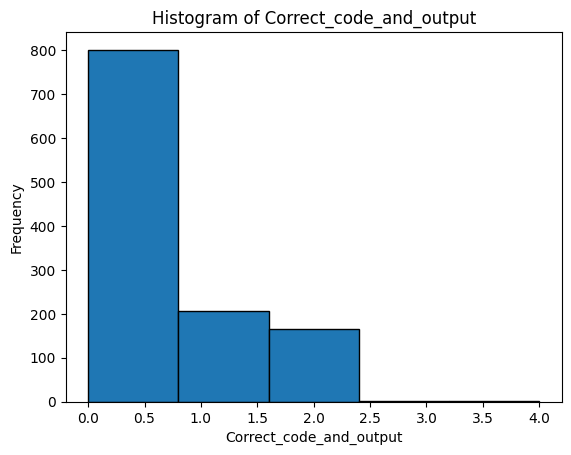

Mean of Final_Marks: 0.46599
Variance of Final_Marks: 0.55156


In [ ]:
#2 plotting histogram using matplitlib
import matplotlib.pyplot as plt
plt.hist(df['Correct_code_and_output'], bins=5, edgecolor='black')
plt.xlabel('Correct_code_and_output')
plt.ylabel('Frequency')
plt.title('Histogram of Correct_code_and_output')

plt.show()

mean_final_marks = np.mean(df['Correct_code_and_output'])
variance_final_marks = np.var(df['Correct_code_and_output'])

print(f"Mean of Final_Marks: {mean_final_marks:.5f}")
print(f"Variance of Final_Marks: {variance_final_marks:.5f}")

In [ ]:
df['Correct_code_and_output'].unique()

array([2, 0, 1, 3, 4])

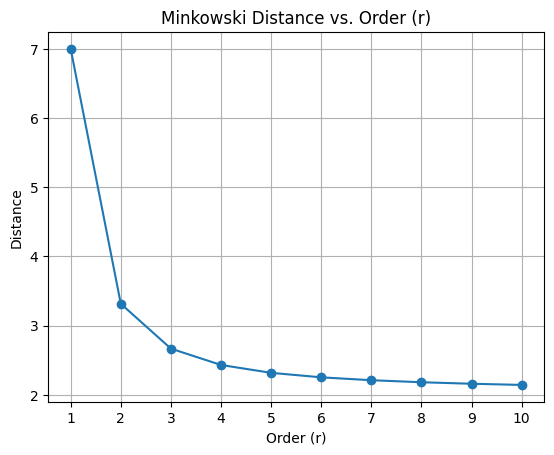

Minkowski Distance with r=1: 7.00000
Minkowski Distance with r=2: 3.31662
Minkowski Distance with r=3: 2.66840
Minkowski Distance with r=4: 2.43230
Minkowski Distance with r=5: 2.31854
Minkowski Distance with r=6: 2.25361
Minkowski Distance with r=7: 2.21186
Minkowski Distance with r=8: 2.18261
Minkowski Distance with r=9: 2.16082
Minkowski Distance with r=10: 2.14386


In [ ]:
#3
from scipy.spatial.distance import minkowski
import numpy as np
import matplotlib.pyplot as plt

# Select two feature vectors (rows) from the dataset
vec1 = df.iloc[0].values  # First row
vec2 = df.iloc[5].values  # Second row

r_values = np.arange(1, 11)  # array with values from 1 to 10
distances = [minkowski(vec1, vec2, r) for r in r_values]  # Calculates Minkowski distances for each r
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance vs. Order (r)')
plt.xlabel('Order (r)')
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(r_values)
plt.show()

for r, dist in zip(r_values, distances):
    print(f"Minkowski Distance with r={r}: {dist:.5f}")


In [ ]:
#4
import numpy as np
from sklearn.model_selection import train_test_split
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #dividing data into test and train

print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)
print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

Training feature shape: (823, 5)
Testing feature shape: (353, 5)
Training labels shape: (823,)
Testing labels shape: (353,)
X_train:
      Header_and_Main_Declaration  Incomprehensible_Code  \
533                             2                    2.0   
542                             2                    2.0   
692                             2                    1.0   
462                             2                    2.0   
991                             2                    0.0   
...                           ...                    ...   
1044                            2                    1.0   
1095                            2                    2.0   
1130                            3                    0.0   
860                             2                    2.0   
1126                            3                    0.0   

      Comprehensible_Code_with_logical_errors  \
533                                         0   
542                                         1   

In [ ]:
#5
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#6
accuracy = model.score(X_test, y_test)
print("Accuracy of the kNN classifier (k=3):", accuracy)

Accuracy of the kNN classifier (k=3): 0.9801699716713881


In [ ]:
#7
prediction = model.predict(X_test)
print("Prediction for the given vector:", prediction)

Prediction for the given vector: [1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1
 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1
 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1
 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0]


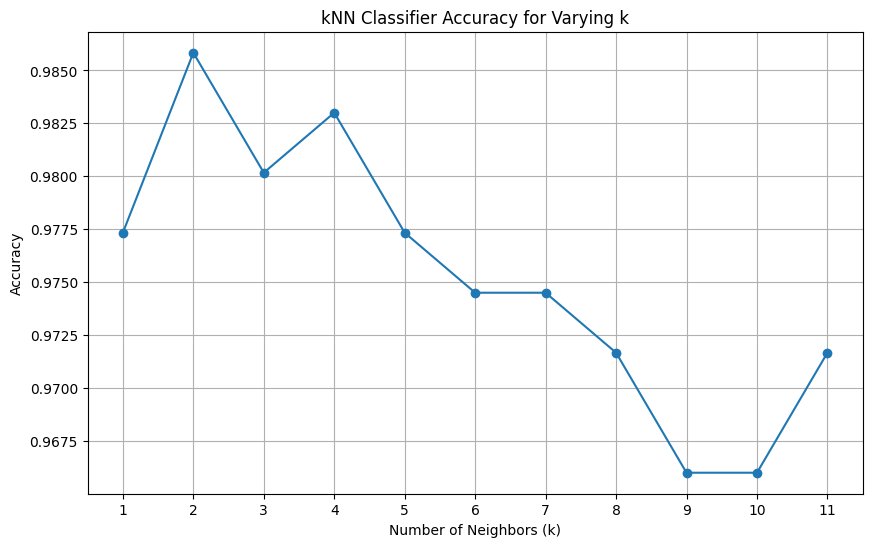

In [ ]:
#8
from sklearn.metrics import accuracy_score

accuracies = []

for k in range(1, 12):
    neigh = KNeighborsClassifier(n_neighbors=k)

    neigh.fit(X_train, y_train)

    y_pred = neigh.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    accuracies.append(accuracy)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), accuracies, marker='o')
plt.title('kNN Classifier Accuracy for Varying k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

In [ ]:
#9
model = KNeighborsClassifier(3)
model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, classification_report

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

class_report_train = classification_report(y_train, y_train_pred)
class_report_test = classification_report(y_test, y_test_pred)

print("Confusion Matrix (Training Set):")
print(conf_matrix_train)

print("\nConfusion Matrix (Test Set):")
print(conf_matrix_test)

print("\nClassification Report (Training Set):")
print(class_report_train)

print("\nClassification Report (Test Set):")
print(class_report_test)

Confusion Matrix (Training Set):
[[270   2]
 [  1 550]]

Confusion Matrix (Test Set):
[[117   2]
 [  5 229]]

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       272
           1       1.00      1.00      1.00       551

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       119
           1       0.99      0.98      0.98       234

    accuracy                           0.98       353
   macro avg       0.98      0.98      0.98       353
weighted avg       0.98      0.98      0.98       353

